In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load training data
raw_training_data = pd.read_csv('./raw_data/train.csv')

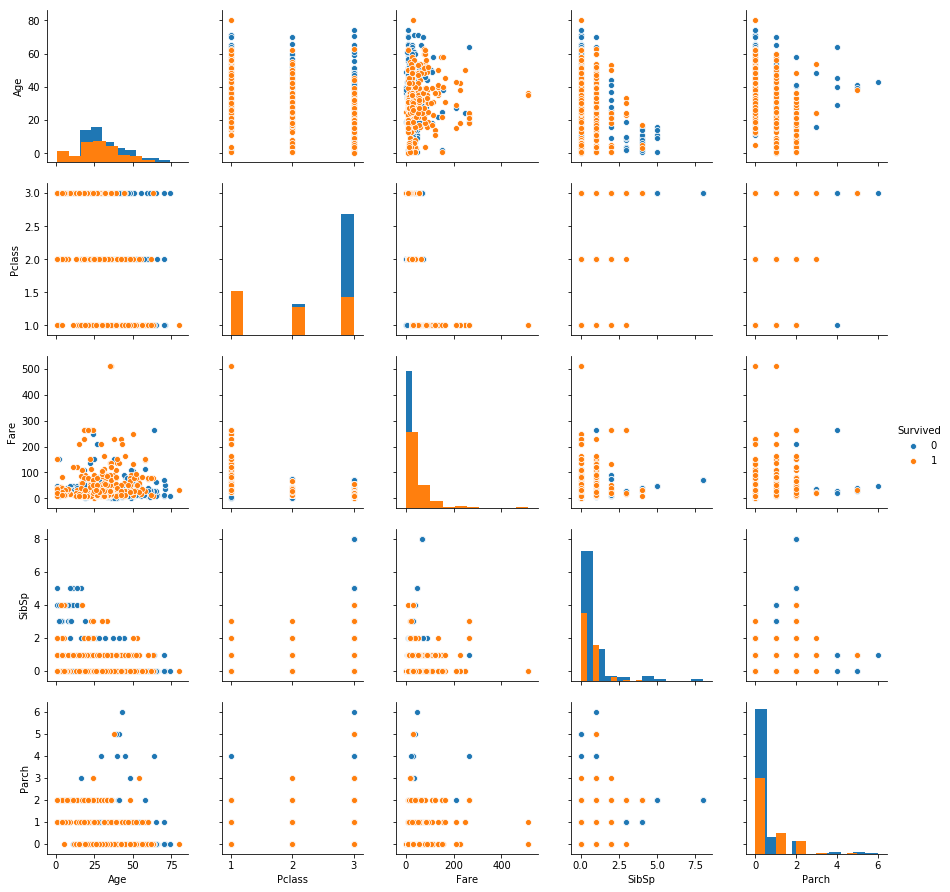

In [16]:
# Test plotting
features = ['Age', 'Pclass', 'Fare', 'SibSp', 'Parch']
sns.pairplot(raw_training_data, vars=features, hue='Survived', diag_kind='hist')

In [3]:
# Ideas
#   Name parsing:
#     Determine if a woman is single or married
#     Determine if they have a title fancier than Mr. or Mrs. (research passenger manifests)
#     Determine if they are 

# Master = young man
# Miss = young woman or unmarried woman

In [4]:
# Match pairs of kepler and gaia measurements within angdist
#kepler_coord = SkyCoord(ra=kepler.ra.values*u.degree, dec=kepler.dec.values*u.degree)
#gaia_coord = SkyCoord(ra=gaia.ra.values*u.degree, dec=gaia.dec.values*u.degree)
#idx1, sep2d, _ = match_coordinates_sky(kepler_coord, gaia_coord, nthneighbor=1)
#idx2 = idx1
#idx1, idx2, sep2d, _ = search_around_sky(kepler_coord, gaia_coord, angdist)

In [5]:
# Select corresponding rows from the full data sets
#kepler = kepler.iloc[idx1]
#gaia = gaia.iloc[idx2]

In [6]:
# Renumber row indices and join into one data frame
#kepler.index = range(0, len(idx1))
#gaia.index = range(0, len(idx2))
#data = pd.concat([kepler, gaia], axis=1)

In [7]:
# JOIN datasets on kepid
data = pd.merge(kepler, gaia, on='kepid', how='inner', suffixes=['_kepler','_gaia'])

Text(0, 0.5, 'parallax')

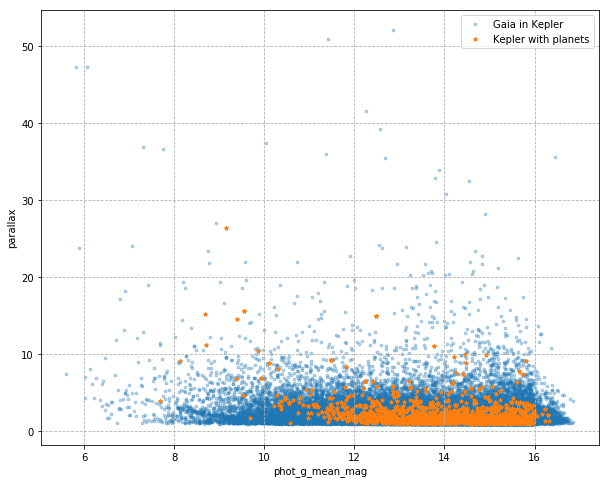

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(gaia.phot_g_mean_mag, gaia.parallax, marker='o', s=8, alpha=0.3, label='Gaia in Kepler')
plt.scatter(data.phot_g_mean_mag, data.parallax, marker='*', s=15, label='Kepler with planets')
plt.grid(linestyle='--')
plt.legend()
plt.xlabel('phot_g_mean_mag')
plt.ylabel('parallax')

In [9]:
features = ['phot_g_mean_mag', 'phot_rp_mean_mag', 'phot_bp_mean_mag', 'phot_g_mean_flux_error', 'parallax', 'parallax_error', 'l', 'b', 'pmra', 'pmdec']

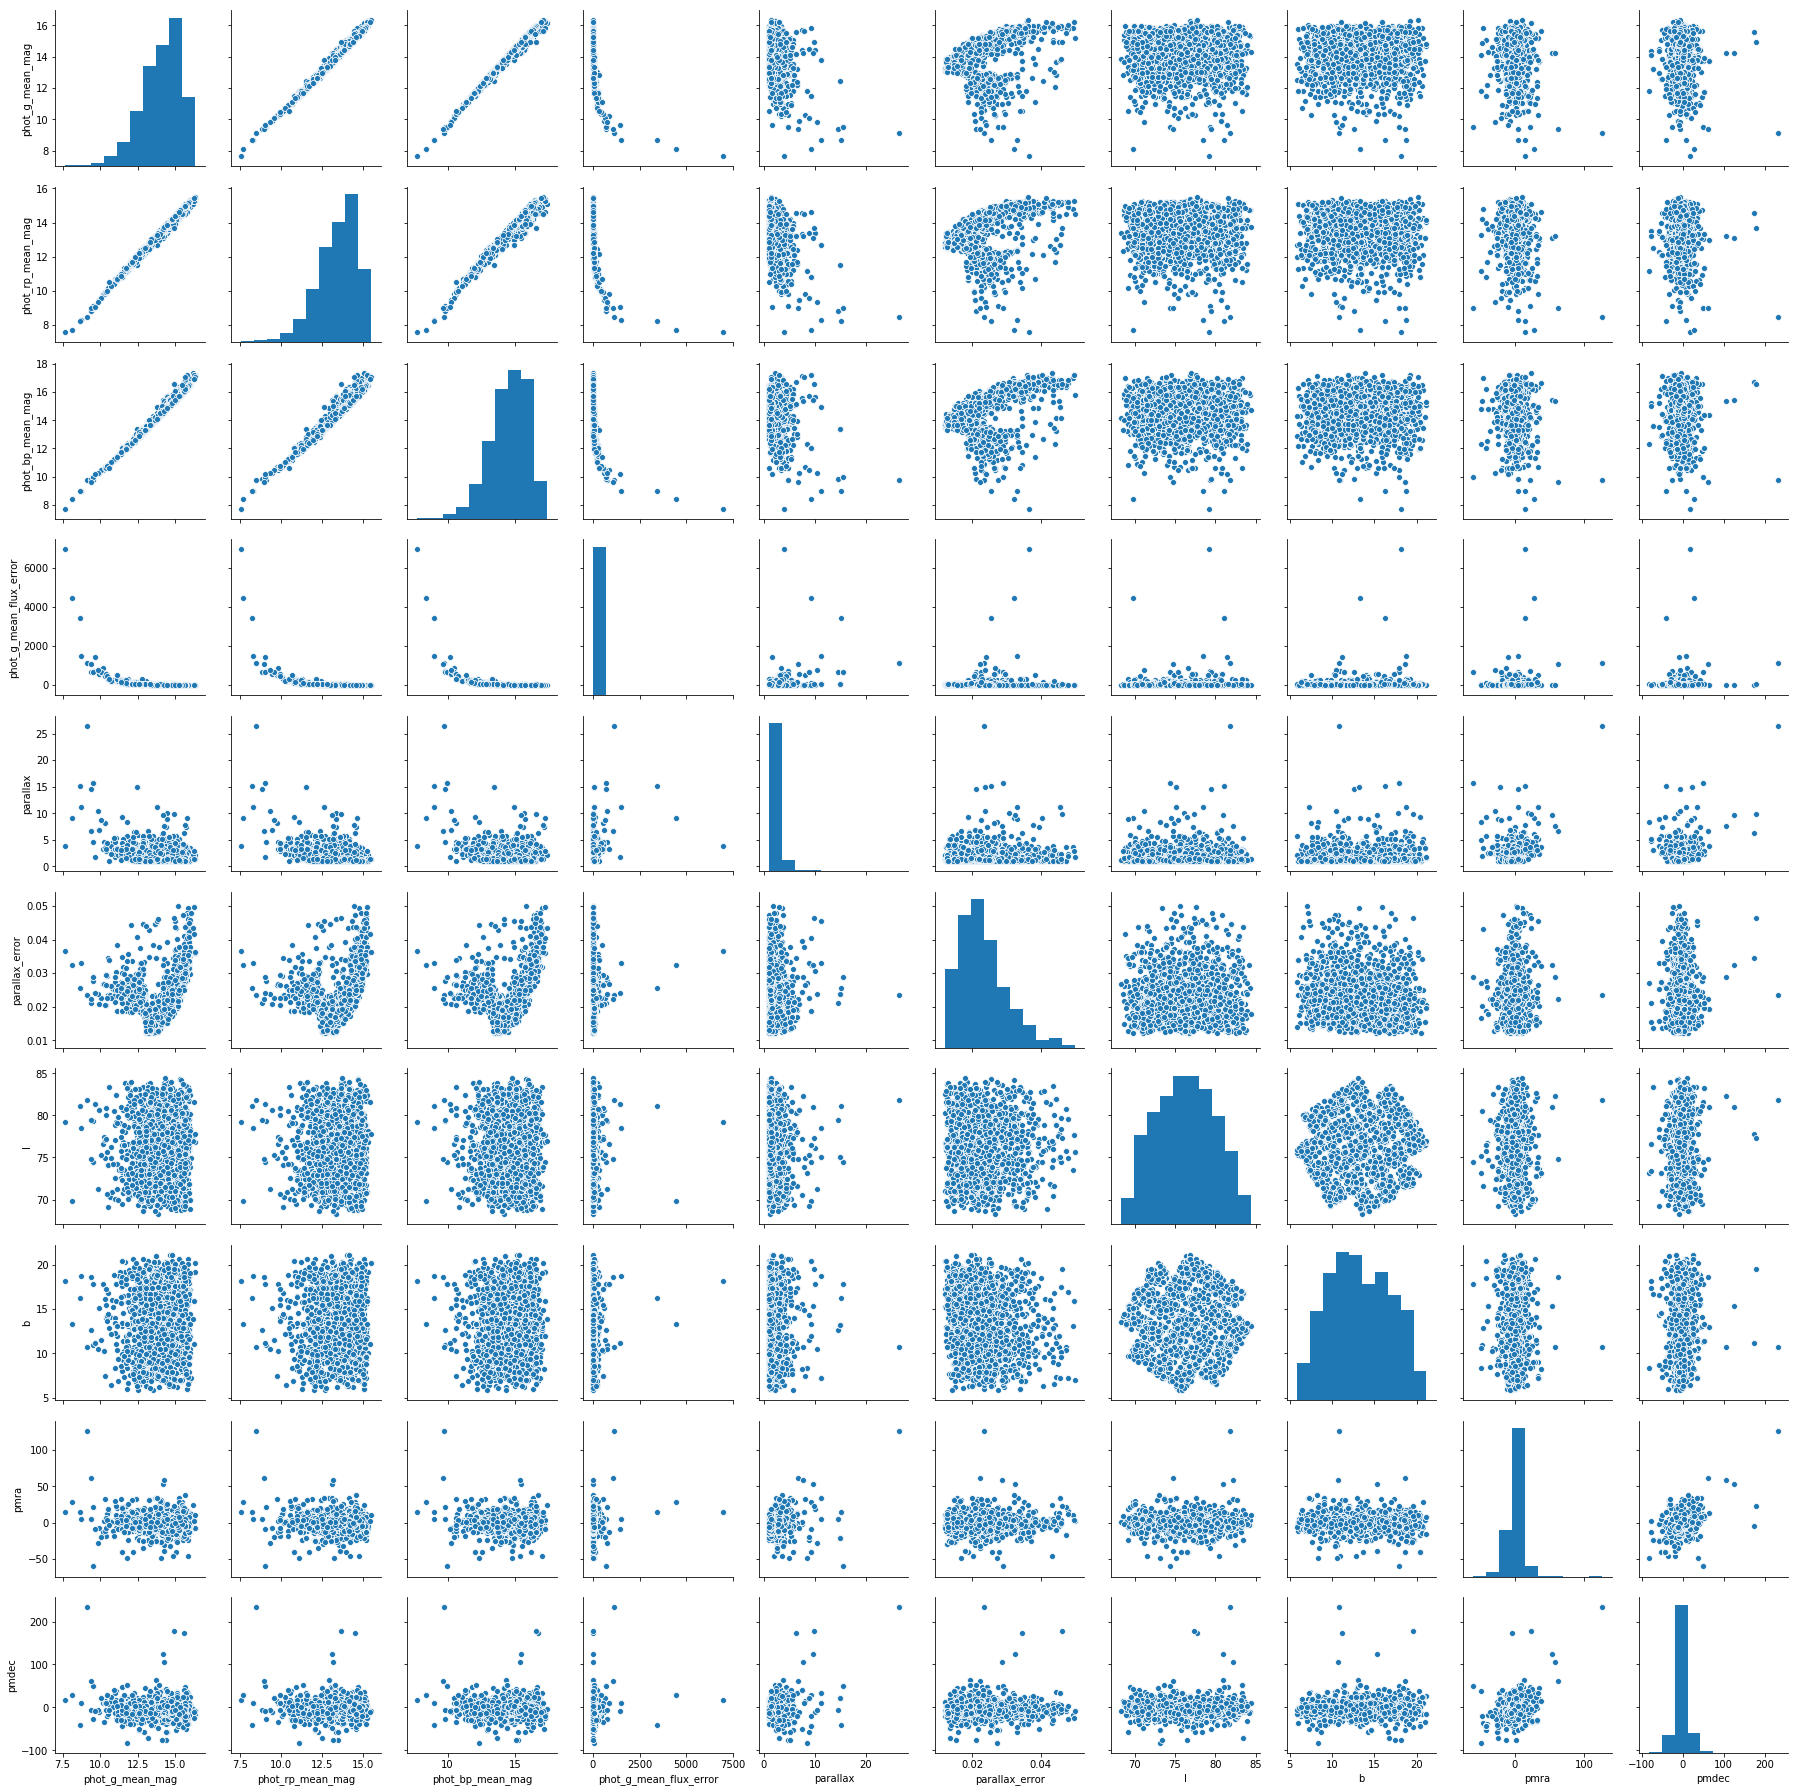

In [10]:
sns.pairplot(data, vars=features, diag_kind='auto')

In [11]:
data.koi_disposition.unique()

array(['CONFIRMED', 'CANDIDATE'], dtype=object)

/home/tanner/.virtualenvs/machine_learning_hackathon/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tanner/.virtualenvs/machine_learning_hackathon/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'koi score')

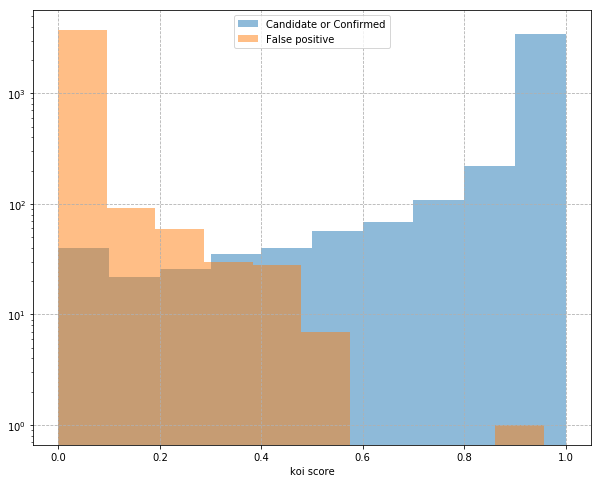

In [12]:
plt.figure(figsize=(10,8))
plt.hist(kepler_raw[kepler_raw.koi_disposition != "FALSE POSITIVE"].koi_score.values, log=True, alpha=0.5, label='Candidate or Confirmed')
plt.hist(kepler_raw[kepler_raw.koi_disposition == "FALSE POSITIVE"].koi_score.values, log=True, alpha=0.5, label='False positive')
plt.grid(linestyle='--')
plt.legend()
plt.xlabel('koi score')

In [13]:
kepler = kepler_raw[((kepler_raw.koi_disposition == "FALSE POSITIVE") & (kepler_raw.koi_score <= 0.1)) | ((kepler_raw.koi_disposition.isin(['CANDIDATE', 'CONFIRMED'])) & (kepler_raw.koi_score >= 0.9))]

In [14]:
disposition_counts_raw = Counter(kepler_raw.koi_disposition.values)
disposition_counts = Counter(kepler.koi_disposition.values)

In [15]:
disposition_counts

Counter({'CONFIRMED': 2116, 'FALSE POSITIVE': 3764, 'CANDIDATE': 1344})

In [16]:
disposition_counts_raw

Counter({'CONFIRMED': 2293, 'FALSE POSITIVE': 5023, 'CANDIDATE': 2248})

In [17]:
gaia[features].corr()

,phot_g_mean_mag,phot_rp_mean_mag,phot_bp_mean_mag,phot_g_mean_flux_error,parallax,parallax_error,l,b,pmra,pmdec
phot_g_mean_mag,1.000000,0.996300,0.995151,-0.177862,-0.198741,0.260817,0.008210,0.037527,-0.042440,-0.021534
phot_rp_mean_mag,0.996300,1.000000,0.983273,-0.187748,-0.244044,0.233463,0.009581,0.037070,-0.046062,-0.023863
phot_bp_mean_mag,0.995151,0.983273,1.000000,-0.163015,-0.140250,0.293463,0.007264,0.039057,-0.037301,-0.018168
phot_g_mean_flux_error,-0.177862,-0.187748,-0.163015,1.000000,0.080068,0.048812,0.003123,-0.002525,-0.003820,0.000824
parallax,-0.198741,-0.244044,-0.140250,0.080068,1.000000,0.105038,-0.001347,0.036649,0.089027,0.057656
parallax_error,0.260817,0.233463,0.293463,0.048812,0.105038,1.000000,-0.029875,-0.082445,0.009278,0.005812
l,0.008210,0.009581,0.007264,0.003123,-0.001347,-0.029875,1.000000,0.025283,0.005422,0.020145
b,0.037527,0.037070,0.039057,-0.002525,0.036649,-0.082445,0.025283,1.000000,-0.031821,0.014870
pmra,-0.042440,-0.046062,-0.037301,-0.003820,0.089027,0.009278,0.005422,-0.031821,1.000000,0.366971
pmdec,-0.021534,-0.023863,-0.018168,0.000824,0.057656,0.005812,0.020145,0.014870,0.366971,1.000000


In [18]:
# Notes:
#   Better selection (maybe only FALSE POSITIVE with koi_score <= 0.1 and CONFIRMED/CANDIDATE with koi_score >= 0.9)
#   Do some feature scaling

In [19]:
# Downselect kepler to remove false positives
kepler = kepler_raw.loc[(kepler_raw.koi_disposition != 'FALSE POSITIVE') & (kepler_raw.koi_score >= 0.9)]
gaia = gaia_raw
# Merge data
data = pd.merge(kepler, gaia, on='kepid', how='inner', suffixes=['_kepler','_gaia'])
# Add planet probability
gaia['planet_prob'] = 0
gaia.loc[gaia['source_id'].isin(data.source_id.values), 'planet_prob'] = 1

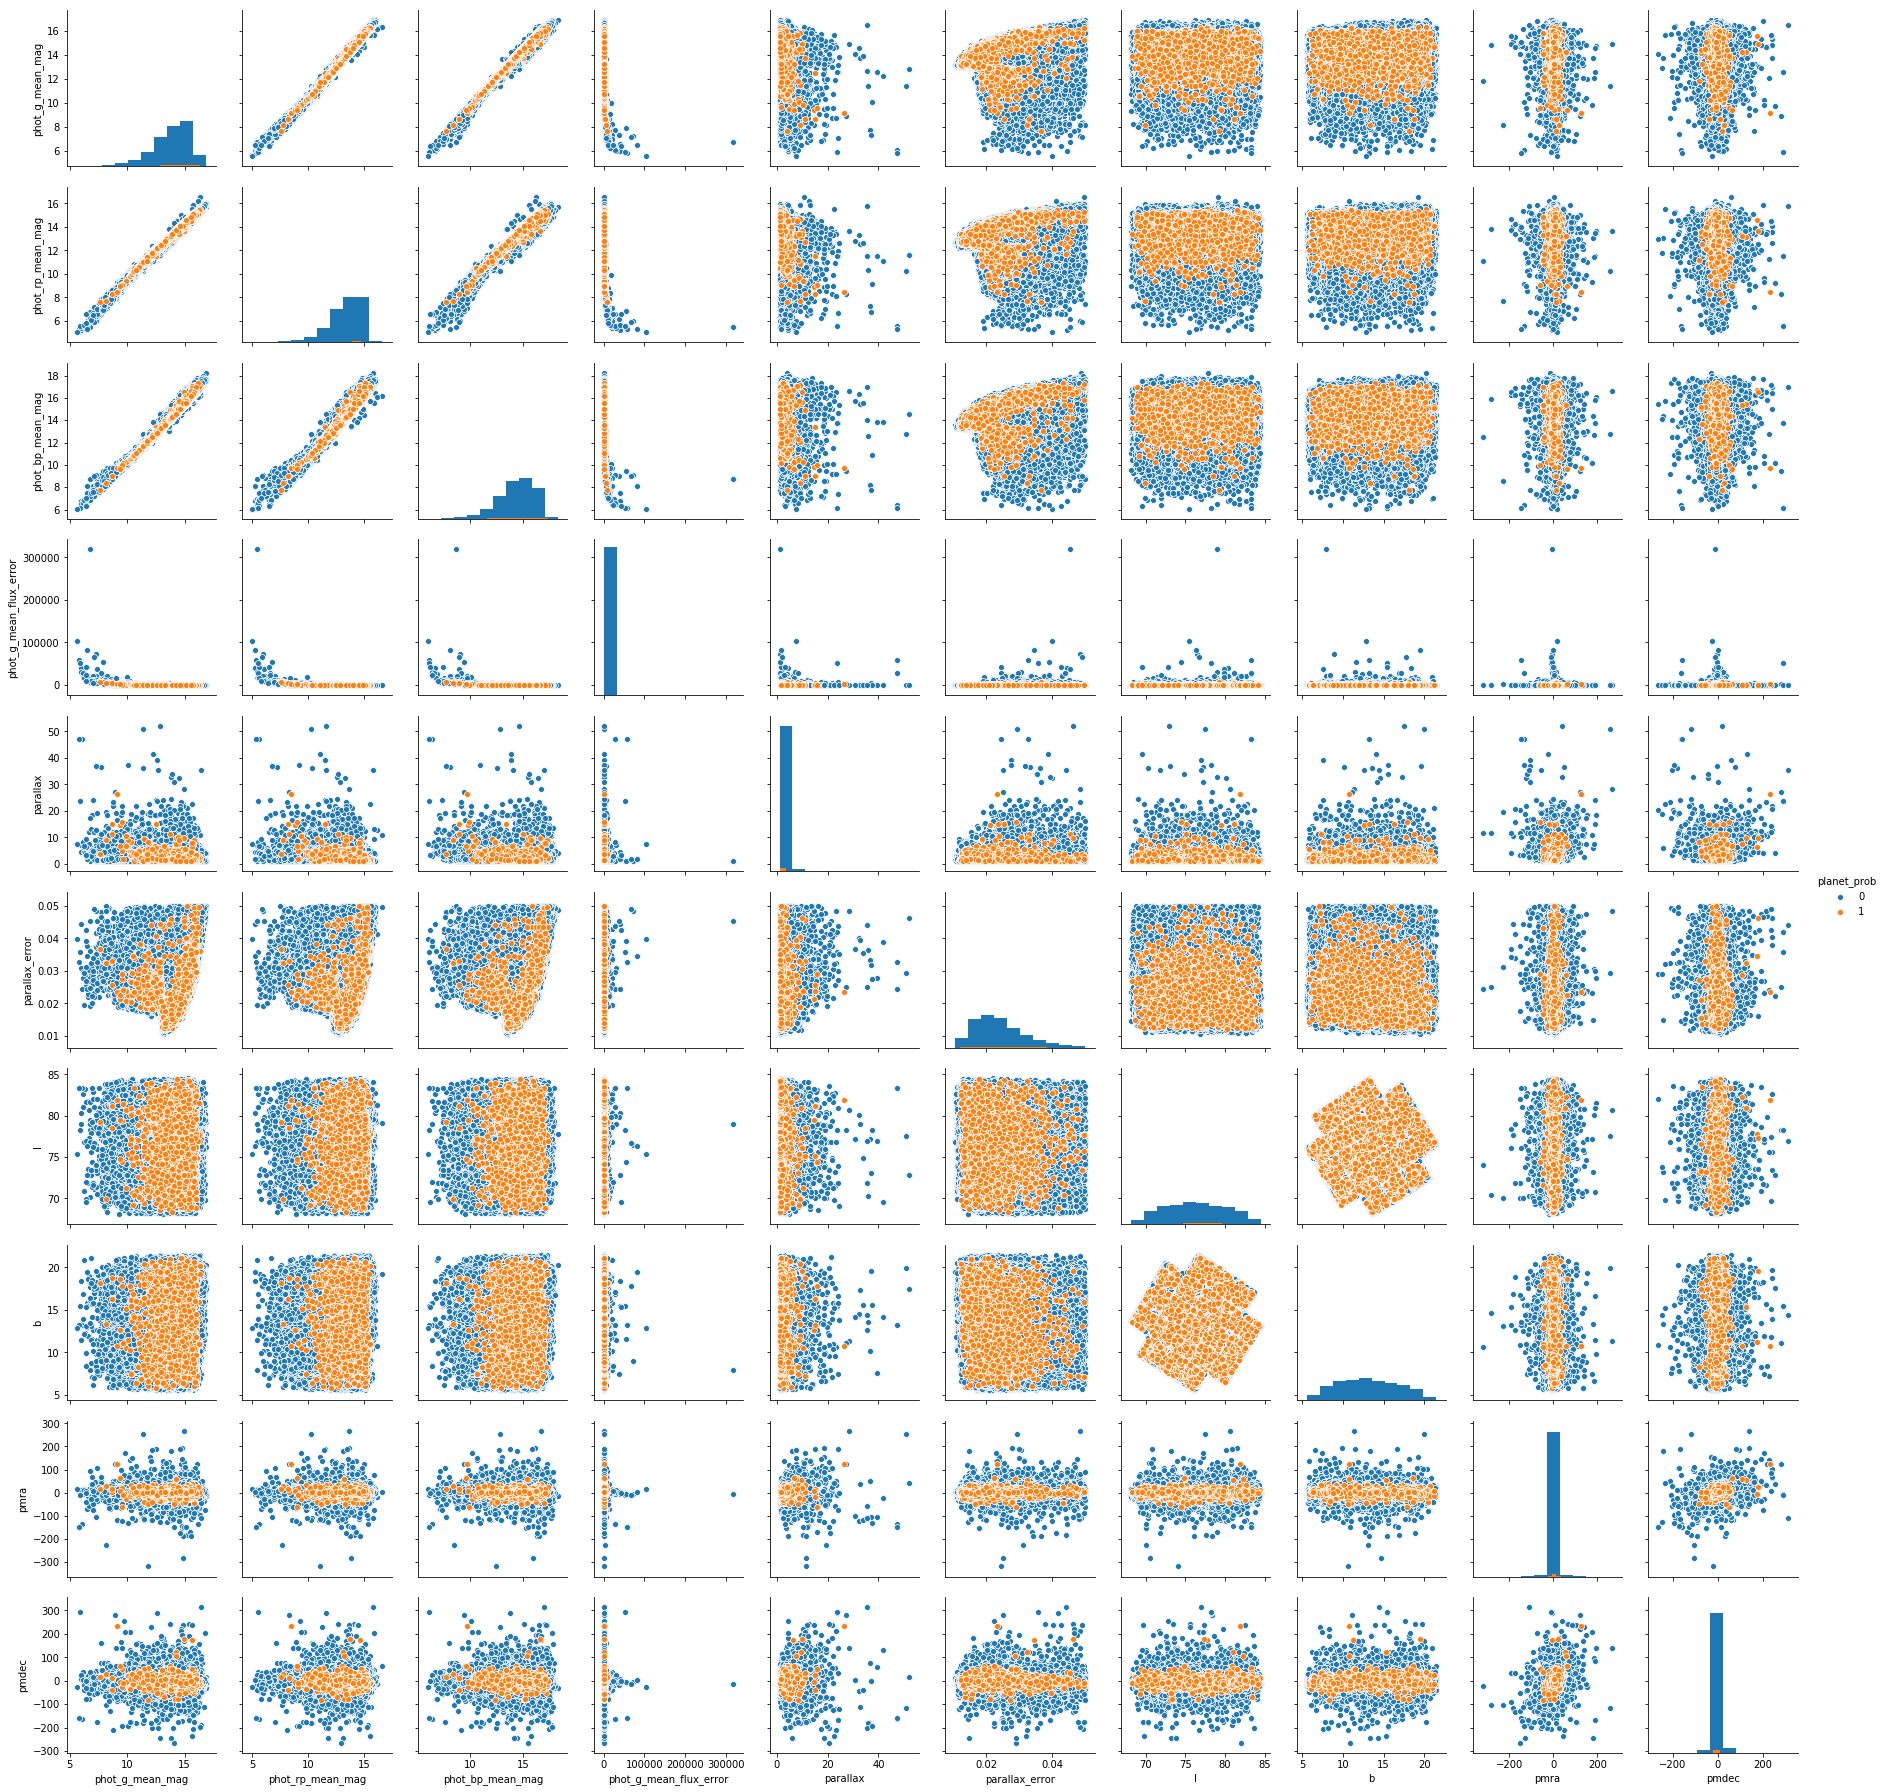

In [20]:
# Make plot
sns.pairplot(gaia, vars=features, hue='planet_prob', diag_kind='hist')